In [2]:
# Import Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Import dataloader
from torch.utils.data import DataLoader

# Check version
print(f"PyTorch version: {torch.__version__} \n torchvision version: {torchvision.__version__}")

device = "cuda" if torch.cuda.is_available() else "cpu"
device

PyTorch version: 1.10.0 
 torchvision version: 0.11.0a0+fa347eb


'cuda'

train_data type is torchvision.datasets.mnist.FashionMNIST
the len of train data is 60000 
 the len of test data is 10000
the train_data[0] image shape is torch.Size([1, 28, 28]) and the label is 9
class name is ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Text(0.5,1,'Ankle boot')

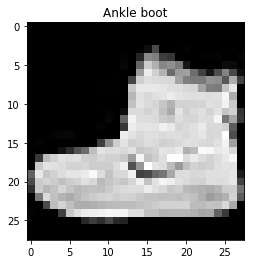

In [3]:
# Setup training data
train_data = datasets.FashionMNIST(
        root="data", # where to download data to ?
        train=True, # get training data
        download=True, # download data if it doesn't exist on disk
        transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
        target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# See first training sample
image, label = train_data[0]
class_names = train_data.classes
print(f"train_data type is {type(train_data)}")
print(f"the len of train data is {len(train_data.data)} \n the len of test data is {len(test_data.data)}")
print(f"the train_data[0] image shape is {image.shape} and the label is {label}")
print(f"class name is {class_names}")

# Visualizing our data
plt.imshow(image.squeeze()) # image shape is [1, 28, 28](colour channels, height, width)
plt.title(label)
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])



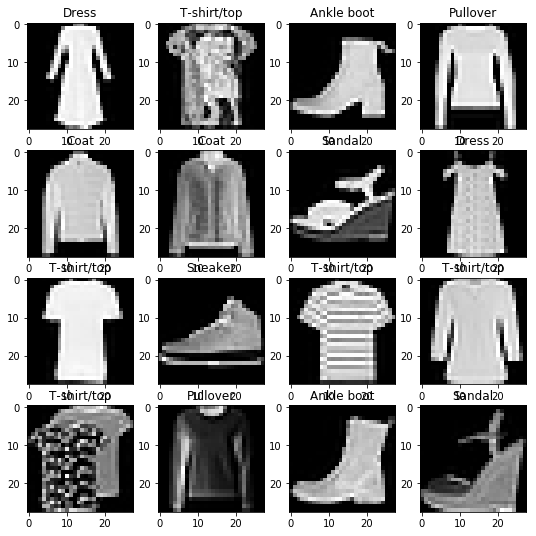

In [4]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    #plt.axis(False)

In [5]:
# Setup batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterable (batches)
train_dataloader = DataLoader(train_data, #dataset to turn into iterable
                             batch_size=BATCH_SIZE, # how many samples per batch
                             shuffle=True # shuffle data every epoch
                             )

test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

# Checkout what we've created
print(f"Dataloader: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader:{len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of train dataloader:{len(test_dataloader)} batches of {BATCH_SIZE}")


                              

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x7f3df93cc0>, <torch.utils.data.dataloader.DataLoader object at 0x7f3df93c50>)
Length of train dataloader:1875 batches of 32
Length of train dataloader:313 batches of 32


In [6]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 2, label size: torch.Size([])


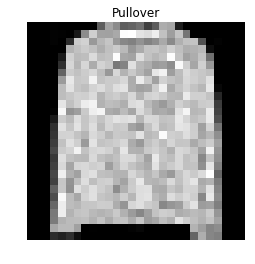

In [7]:
# Show a sample
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [8]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

print(x)
print(output)
      
      

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.3686, 0.4902, 0.4902, 0.5529, 0.6118, 0.6667,
          0.5686, 0.4314, 0.3882, 0.1255, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.4157, 1.0000, 0.9569, 1.0000, 0.9569, 0.8863, 0.8745, 0.9412,
          0.8941, 1.0000, 0.9647, 0.9882, 0.5961, 0.0000, 0.0039, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.9020, 0.8588, 0.9216, 0.8314, 0.6549, 0.5804, 0.5961, 0.6549,
          0.7686, 0.7647, 0.7686, 0.9725, 0.7608, 0.0000, 0.0039, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 

In [9]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(), # neural networks like their inputs in vector form
                                        nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sapmle (784 pixels)
                                        nn.Linear(in_features=hidden_units, out_features=output_shape)
                                        )
    def forward(self, x):
        return self.layer_stack(x)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, hidden_units=10, output_shape=len(class_names))
model_0.to(device)

    

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [10]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [11]:
from tqdm.auto import tqdm
# Set the number of epochs
epochs = 3

# Create trainning and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    # Training
    train_loss = 0
    # Add a loop to loop through trainning batches
    for batch, (X, y) in enumerate(train_dataloader):
        
        X = X.to(device)
        y = y.to(device)
        
        # 0. Training
        model_0.train()
        
        # 1. Forward pass
        y_pred = model_0(X)
        
        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
            
    train_loss /= len(train_dataloader)
    print(f"loss is : {train_loss}")
    
    # Testing
    test_loss = 0
    model_0.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            X,y = X.to(device), y.to(device)
            # 1. Forward pass
            test_pred = model_0(X)
            
            # 2. Calculate loss
            test_loss += loss_fn(test_pred, y)
        
        test_loss /= len(test_dataloader)
        
    print(f"Train loss:{train_loss:.5f} | Test loss:{test_loss:.5f}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
loss is : 0.583384096622467
Train loss:0.58338 | Test loss:0.48760
Epoch: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
loss is : 0.47351714968681335
Train loss:0.47352 | Test loss:0.50868
Epoch: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
loss is : 0.455100417137146
Train loss:0.45510 | Test loss:0.46674


In [12]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists")
else:
    print("Downloading helper_functions.py")
    # Note: you need the "raw" Github URL for this to work
    request = requests.get("https://raw.githubusercontent.com/pendingbit/pytorch-deep-learning/blob/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)


helper_functions.py already exists


In [13]:
from helper_functions import accuracy_fn
def eval_model(model:torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn:torch.nn.Module,accuracy_fn, device:torch.device=device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X , y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
            
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name" : model.__class__.__name__,
           "model_loss" : loss.item(),
           "model_acc" : acc}

model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.46674221754074097,
 'model_acc': 83.77595846645367}

In [14]:
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device:torch.device=None):
    total_time = end -start
    print(f"Train time on {device} : {total_time:.3f} seconds")
    return total_time

In [15]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        ) 
            
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [16]:
model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [17]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [18]:
def train_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              optimizer:torch.optim.Optimizer,
              accuracy_fn,
              device:torch.device=device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X,y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass
        y_pred = model(X)
        
        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    
def test_step(data_loader:torch.utils.data.DataLoader,
             model:torch.nn.Module,
             loss_fn:torch.nn.Module,
             accuracy_fn,
             device:torch.device=device):
    test_loss, test_acc = 0,0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
            
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")
    

In [19]:
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----------")
    train_step(data_loader=train_dataloader,
              model=model_1,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn
              )
    test_step(data_loader=test_dataloader,
             model=model_1,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn)
    
train_time_end_on_gpu = timer()
total_train_time_mdel_1 = print_train_time(start=train_time_start_on_gpu,
                                          end=train_time_end_on_gpu,
                                          device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Train loss: 0.63914 | Train accuracy: 77.18%
Test loss: 0.50178 | Test accuracy: 81.93%
Epoch: 1
-----------
Train loss: 0.47970 | Train accuracy: 82.66%
Test loss: 0.46825 | Test accuracy: 82.79%
Epoch: 2
-----------
Train loss: 0.44658 | Train accuracy: 83.81%
Test loss: 0.49478 | Test accuracy: 81.22%
Train time on cuda : 197.253 seconds


In [20]:
model_1_results = eval_model(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.4947817325592041,
 'model_acc': 81.22004792332268}

In [21]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
            )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                     out_features=output_shape)
            )
    def forward(self, x:torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        
        return x
    
model_2 =FashionMNISTModelV2(input_shape=1, hidden_units=10,output_shape=len(class_names)).to(device)
model_2
    

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [22]:
# Setup  loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [23]:
# Measure time
from timeit import default_timer as timer
train_time_start = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
               model=model_2,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device
        )
    test_step(data_loader=train_dataloader,
             model=model_2,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device
        )
    
train_time_end = timer()
print_train_time(start=train_time_start, end=train_time_end,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.60841 | Train accuracy: 77.97%
Test loss: 0.37574 | Test accuracy: 86.59%
Epoch: 1
---------
Train loss: 0.35176 | Train accuracy: 87.27%
Test loss: 0.31528 | Test accuracy: 88.83%
Epoch: 2
---------
Train loss: 0.31526 | Train accuracy: 88.55%
Test loss: 0.28114 | Test accuracy: 89.89%
Train time on cuda : 437.385 seconds


437.38504068400016

In [24]:
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_2_results = eval_model(model=model_2,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)


In [25]:
import pandas as pd
compare_result = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_result


,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.466742,83.775958
1,FashionMNISTModelV1,0.494782,81.220048
2,FashionMNISTModelV2,0.315436,88.588259


Text(0,0.5,'model')

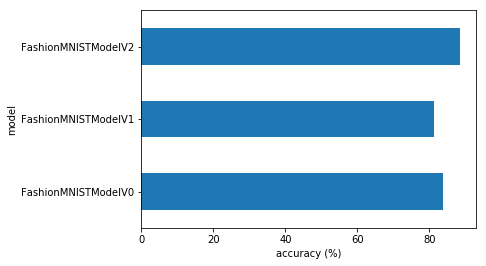

In [26]:
# Visualize our model_results
compare_result.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [27]:
def make_predictions(model:torch.nn.Module, data:list, device:torch.device=device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample 
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device
            
            # Forward pass
            pred_logit = model(sample)
            
            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            
            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)

In [28]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
    
print(f"Test sample image shape: {test_samples[0].shape}\n Test sample label:{test_labels[0]} ({class_names[test_labels[0]]})")
print(len(test_samples))
      

Test sample image shape: torch.Size([1, 28, 28])
 Test sample label:5 (Sandal)
9


In [29]:
pred_probs = make_predictions(model=model_2, data=test_samples)

pred_probs[:2]
pred_probs.shape

torch.Size([9, 10])

In [30]:
pred_classes = pred_probs.argmax(dim=1)
test_labels,pred_classes

([5, 3, 1, 6, 7, 3, 7, 2, 6], tensor([5, 4, 1, 6, 7, 3, 7, 2, 6]))

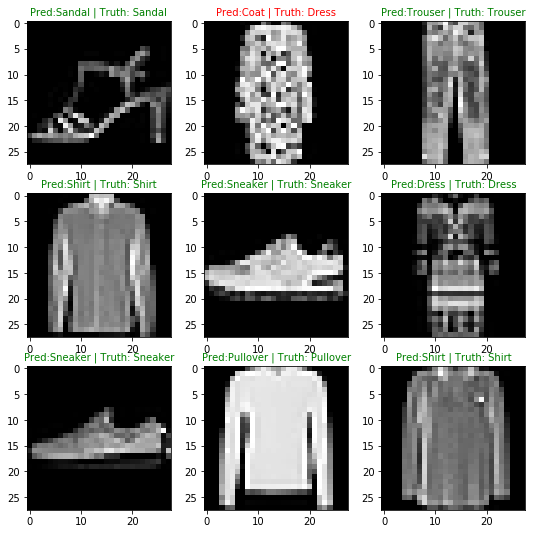

In [31]:
# Plost predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols =3
for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)
    
    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")
    
    # Find the prediction label
    pred_label = class_names[pred_classes[i]]
    
    # Get the truth label
    truth_label = class_names[test_labels[i]]
    
    # Create the title text of the plot
    title_text = f"Pred:{pred_label} | Truth: {truth_label}"
    
    # Check for equality and change title colour accordingly
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, color="green") # green for correct
    else:
        plt.title(title_text, fontsize=10, color="red") # red for wrong
    #plt.axis(False)